# Célula 1:

Bibliotecas utilizadas e definições iniciais, como variáveis e energias no sistema.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definição de variáveis

g_val = 9.81 # Aceleração da gravidade em metros por segundo ao quadrado
R_val = 0.07 # Raio do disco em metros
r_val = 0.003 # Raio da haste em metros
m_val = 0.45 # Massa em KG do disco
H0_val = 0.55 # Altura inicial em que será solto a roda em metros
dt = 0.001 # Variação de tempo em segundos, decidimos arbitrariamente como parâmetro de medição para a simulação

# Momento de inércia para o eixo Z de um cilindro

# I = (m * R**2) / 2

# Definição das energias do sistema para Lagrange

# Energia cinética

# T = ((m * V**2) / 2) * (1 + R**2/2*r**2)

# Energia potencial gravitacional

# U = m * g * h

# Lagrangiano: L = T - U

m, R, r, g, t = sp.symbols('m R r g t')
h = sp.Function('h')(t) # função que varia com o tempo
h_dot = sp.diff(h, t) # h ponto, ou seja, velocidade

# Célula 2:
Definimos o Lagrangiano e chegamos na equação de Lagrange com base nas energias cinética e potencial do sistema que estão definidas acima.

In [2]:
# Lagrangiano

L = (((m * h_dot**2) / 2) * (1 + R**2/(2*r**2))) - (m * g * h)

# Cálculo das derivadas para a equação de Lagrange

DL_dh = sp.diff(L, h)
DL_dh_dot = sp.diff(L, h_dot)
d_dt_DL_dh_dot = sp.diff(DL_dh_dot, t)

# Montamos a equação de Lagrange, EOM (Equation Of Movement)

EOM = d_dt_DL_dh_dot - DL_dh

h_ddot = sp.diff(h, t, 2) # Variável que desejamos isolar para integrarmos para chegar na velocidade e depois de novo para a posição

solucao_aceleracao = sp.solve(EOM, h_ddot) # isola a variável da aceleração e retorna uma lista com a solução

# Imprimindo o resultado para checar

print("Equação da aceleração é:")
sp.pprint(solucao_aceleracao[0])

Equação da aceleração é:
      2  
-2⋅g⋅r   
─────────
 2      2
R  + 2⋅r 


# Célula 3:

Definimos e calculamos as integrais para calcularmos de maneira analítica, sem a utilização de métodos numéricos.

In [3]:
# Obter o valor numérico da aceleração
# Pega a fórmula simbólica da aceleração e substitui os símbolos que usamos nas variáveis
# g, R, r pelos seus valores numéricos definidos no início
a_eff_val = solucao_aceleracao[0].subs([
    (g, g_val),
    (R, R_val),
    (r, r_val)
])

# Converte o resultado do sympy para um número float
a_eff_val = float(a_eff_val)

print(f"Aceleração constante, não depende de variáveis: {a_eff_val:.4f} m/s^2")

# Usamos a equação da posição já conhecida na cinemática para descobrir o tempo total de queda
# h(t) = H0 + 0.5*a*t^2  =>  0 = H0 + 0.5*a*t_final^2
# t_final = sqrt(-2 * H0 / a)
# Considerando que t_final é o tempo que a roda levou para chegar na altura zero
t_final = np.sqrt(-2 * H0_val / a_eff_val)

# Cria o array de tempo, de 0 até t_final, em passos 'dt'
t_array = np.arange(0, t_final + dt, dt)

print(f"Tempo de queda até h = 0 fica: t = {t_final:.2f} s")

# Aplicar as equações (as integrais exatas)

# Primeira integral (Equação da Velocidade: v(t) = a*t)
# (v_array_analitico irá guardar v(t) para cada ponto em t_array)
v_array_analitico = a_eff_val * t_array

# Segunda integral (Equação da Posição: h(t) = H0 + 0.5*a*t^2)
# (h_array_analitico irá guardar h(t) para cada ponto em t_array)
h_array_analitico = H0_val + 0.5 * a_eff_val * t_array**2

# Correção: O último passo pode ficar < 0 por causa dos intervalos 'dt'
# Garantimos que a altura pare em 0.
h_array_analitico[h_array_analitico < 0] = 0

# Agora plotaremos os gráficos que queremos mostrar

# Vamos plotar a magnitude da velocidade, já que por estar contrária ao movimento, está como negativa
# Apenas para deixar o gráfico mais intuitivo
v_mag_analitico = np.abs(v_array_analitico)

# Arrays de descida já existem:
# t_array (0 -> t_final)
# h_array_analitico (H0 -> 0)
# v_array_analitico (0 -> -v_max)

# Criar os dados da subida
# Usamos [1:] para não duplicar o ponto do meio (em t_final, h=0)
t_ascent = t_array[1:] + t_final
h_ascent = np.flip(h_array_analitico)[1:] # 'flip' inverte o array

# A velocidade de subida (h_dot) é positiva.
# v_array_analitico era negativo. Flip inverte a ordem.
# *-1 inverte o sinal (de negativo para positivo).
v_ascent = np.flip(v_array_analitico)[1:] * -1

# Concatenar para criar os arrays do ciclo completo
t_oscilacao = np.concatenate((t_array, t_ascent))
h_oscilacao = np.concatenate((h_array_analitico, h_ascent))
v_oscilacao = np.concatenate((v_array_analitico, v_ascent))

# Printa a velocidade imediatamente antes do "tranco"
print(f"Velocidade imediatamente antes do 'tranco' analiticamente: {v_array_analitico[-1]:.4f} m/s")

# Printa o tempo total da oscilação até chegar de volta no H0, onde v = 0 novamente
print(f"Tempo da oscilação até subir para a altura inicial novamente: {(t_oscilacao[-1]):.2f} s")

Aceleração constante, não depende de variáveis: -0.0359 m/s^2
Tempo de queda até h = 0 fica: t = 5.54 s
Velocidade imediatamente antes do 'tranco' analiticamente: -0.1988 m/s
Tempo da oscilação até subir para a altura inicial novamente: 11.07 s


# Célula 4:

Plot dos gráficos utilizando a solução analítica para a velocidade e posição.

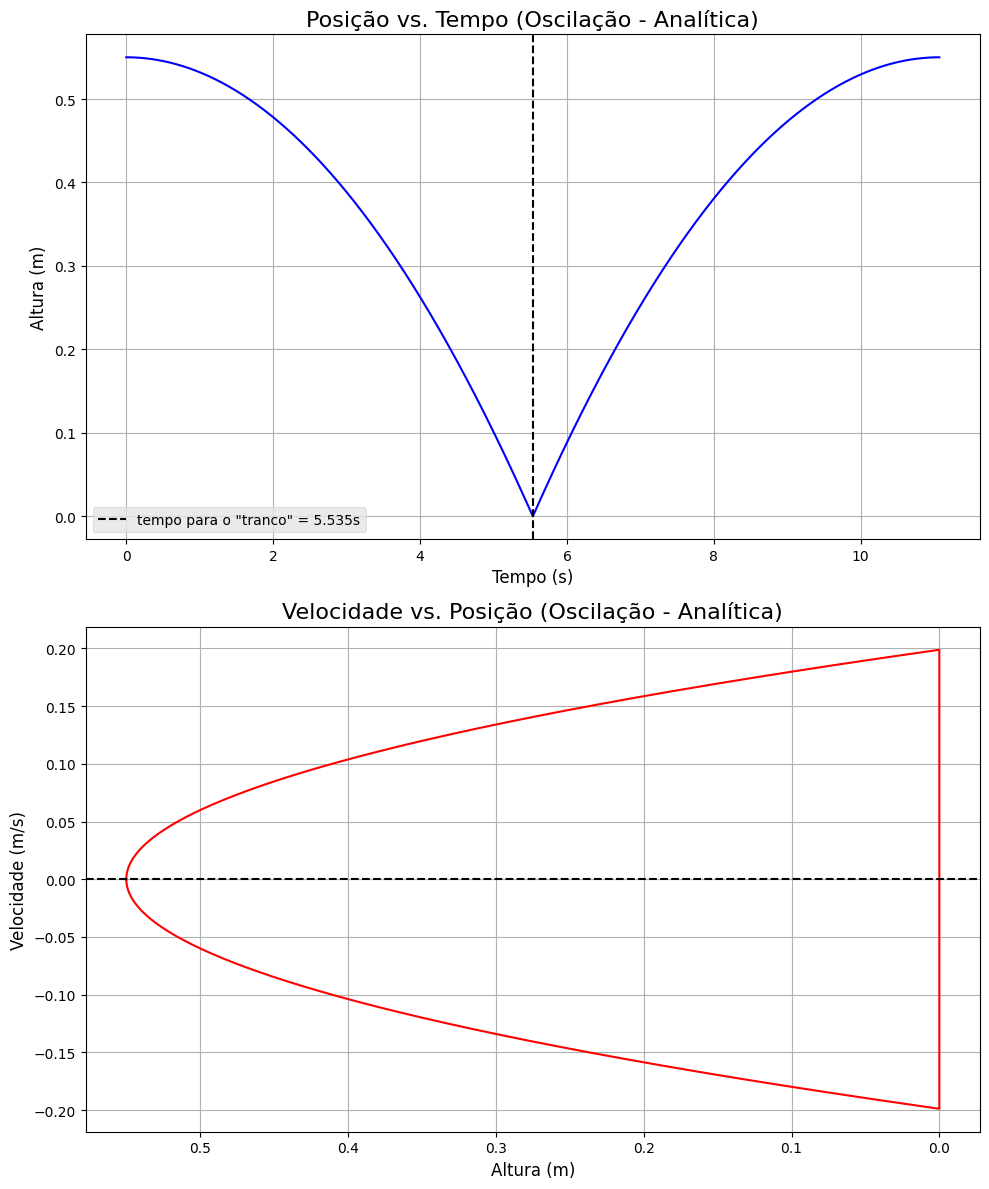

In [4]:
# Configura a figura para ter 2 gráficos
fig, ax = plt.subplots(2, 1, figsize=(10, 12))
plt.style.use('ggplot')

# Gráfico 1: Posição vs. Tempo (Oscilação Analítica)
# Este gráfico mostrará a roda descendo (parábola para baixo)
# e depois subindo (parábola para cima)
ax[0].plot(t_oscilacao, h_oscilacao, linestyle='-', color='blue')
ax[0].set_title('Posição vs. Tempo (Oscilação - Analítica)', fontsize=16)
ax[0].set_xlabel('Tempo (s)', fontsize=12)
ax[0].set_ylabel('Altura (m)', fontsize=12)
ax[0].grid(True)

# Adiciona uma linha vertical para marcar o "tranco" no h = 0
ax[0].axvline(t_final, color='black', linestyle='--', label=f'tempo para o "tranco" = {t_final:.3f}s')
ax[0].legend()

# Gráfico 2: Velocidade vs. Posição (Oscilação - Analítica)
ax[1].plot(h_oscilacao, v_oscilacao, linestyle='-', color='red')
ax[1].set_title('Velocidade vs. Posição (Oscilação - Analítica)', fontsize=16)
ax[1].set_xlabel('Altura (m)', fontsize=12)
ax[1].set_ylabel('Velocidade (m/s)', fontsize=12)
ax[1].grid(True)

# Inverte o eixo X (altura) para ler da "partida" (H0) até a "chegada" (0)
# e vice-versa.
ax[1].invert_xaxis()

# Adiciona uma linha horizontal para marcar v = 0
ax[1].axhline(0, color='black', linestyle='--')

# Ajusta o layout para evitar sobreposição de títulos
plt.tight_layout()

# Mostra os gráficos
plt.show()

# Célula 5:

Realizamos por fins de comparação um método numérico para chegar na solução.

Escolhemos utilizar o método de Euler-Cromer para a solução numérica.

Escolhemos esse método pois ele considera a velocidade como variável ao longo do tempo, diferente do método de Euler, que considera a velocidade como constante. Além disso, usar um método muito completo como o de Runge-Kutta de quarta ordem seria desnecessário para o problema modelado aqui, já que, por não ter perda de energia na nossa modelagem, a aceleração será constante, já que não depende da altura e nem da velocidade, como podemos ver pela equação encontrada.

In [5]:

# Simula o movimento passo a passo (numericamente)

# Pega o número de pontos do t_array (definido na célula analítica)
n_pontos = len(t_array)

# Cria arrays "vazios" para guardar os resultados da descida numérica
h_descida_numerico = np.zeros(n_pontos)
v_descida_numerico = np.zeros(n_pontos)

# Define as condições iniciais (t = 0)
h_descida_numerico[0] = H0_val
v_descida_numerico[0] = 0.0

# Loop de Integração (Descida)
# Este loop simula a física passo a passo
for i in range(n_pontos - 1):
    # Passo 1: v_novo = v_antigo + a*dt
    v_descida_numerico[i+1] = v_descida_numerico[i] + (a_eff_val * dt)

    # Passo 2: h_novo = h_antigo + v_novo*dt
    h_descida_numerico[i+1] = h_descida_numerico[i] + (v_descida_numerico[i+1] * dt)

# Correção: Garante que a altura pare em 0
h_descida_numerico[h_descida_numerico < 0] = 0

# Criar os dados da subida numérica
# Usamos [1:] para não duplicar o ponto do meio
h_subida_numerico = np.flip(h_descida_numerico)[1:]
v_subida_numerico = np.flip(v_descida_numerico)[1:] * -1

# Concatenar para criar os arrays do ciclo completo
# (O t_oscilacao é o mesmo da célula analítica, podemos reusá-lo)
h_oscilacao_numerico = np.concatenate((h_descida_numerico, h_subida_numerico))
v_oscilacao_numerico = np.concatenate((v_descida_numerico, v_subida_numerico))

# Printa a velocidade imediatamente antes do "tranco"
print(f"Velocidade imediatamente antes do 'tranco' numericamente: {v_descida_numerico[-1]:.4f} m/s")

Velocidade imediatamente antes do 'tranco' numericamente: -0.1988 m/s


# Célula 6:

Plot dos gráficos das soluções encontradas com o método numérico para a velocidade e posição.

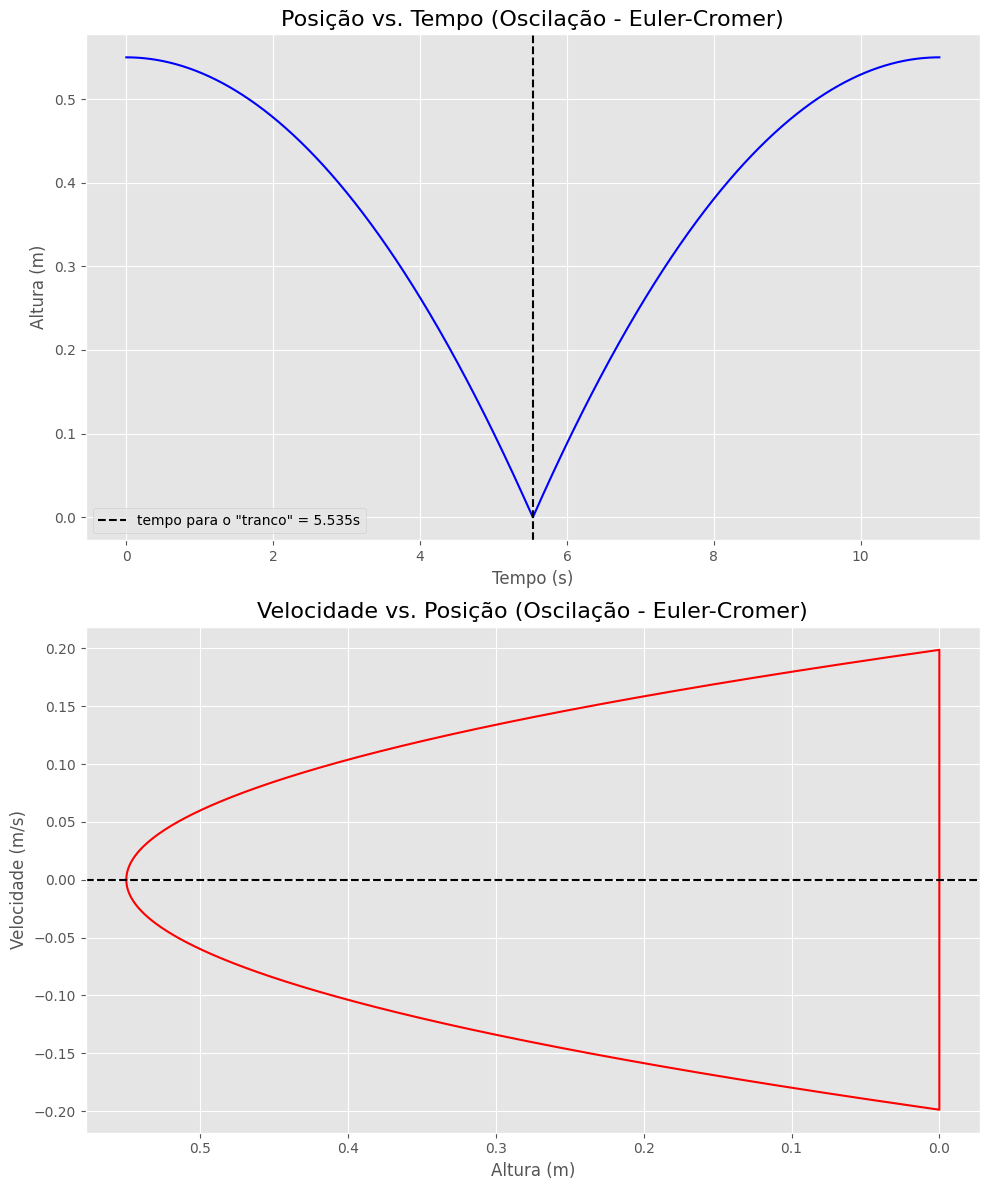

In [6]:
# Configura a figura para ter 2 gráficos
fig, ax = plt.subplots(2, 1, figsize=(10, 12))
plt.style.use('ggplot')

# Gráfico 1: Posição vs. Tempo (Oscilação - Euler-Cromer)
# (Usamos marcadores pequenos para ver os passos da simulação)
ax[0].plot(t_oscilacao, h_oscilacao_numerico, linestyle='-', markersize=3, color='blue')
ax[0].set_title('Posição vs. Tempo (Oscilação - Euler-Cromer)', fontsize=16)
ax[0].set_xlabel('Tempo (s)', fontsize=12)
ax[0].set_ylabel('Altura (m)', fontsize=12)
ax[0].grid(True)

# Adiciona a linha vertical para marcar o "tranco"
ax[0].axvline(t_final, color='black', linestyle='--', label=f'tempo para o "tranco" = {t_final:.3f}s')
ax[0].legend()

# --- Gráfico 2: Velocidade vs. Posição (Oscilação - Euler-Cromer)
ax[1].plot(h_oscilacao_numerico, v_oscilacao_numerico, linestyle='-', markersize=3, color='red')
ax[1].set_title('Velocidade vs. Posição (Oscilação - Euler-Cromer)', fontsize=16)
ax[1].set_xlabel('Altura (m)', fontsize=12)
ax[1].set_ylabel('Velocidade (m/s)', fontsize=12)
ax[1].grid(True)

# Inverte o eixo X (altura)
ax[1].invert_xaxis()

# Adiciona a linha horizontal v = 0
ax[1].axhline(0, color='black', linestyle='--')

# Ajusta o layout e mostra os gráficos
plt.tight_layout()
plt.show()

# Célula 7:

Cáculo das energias cinética e potencial gravitacional em relação à altura.

In [7]:
# 1. Calcular o Momento de Inércia I
I_val = 0.5 * m_val * R_val**2

# 2. Calcular Energia Potencial Ep = mgh
# Usa a altura em cada ponto da oscilação
Ep_numerico = m_val * g_val * h_oscilacao_numerico

# 3. Calcular Energias Cinéticas
# Usa a velocidade em cada ponto da oscilação

# Velocidade angular (omega = v/r)
omega_numerico = v_oscilacao_numerico / r_val

# Ec de Translação (0.5 * m * v^2)
Ek_trans_numerico = 0.5 * m_val * v_oscilacao_numerico**2

# Ec de Rotação (0.5 * I * w^2)
Ek_rot_numerico = 0.5 * I_val * omega_numerico**2

# Ec Total (Translação + Rotação)
Ek_total_numerico = Ek_trans_numerico + Ek_rot_numerico

# 4. Calcular Energia Mecânica Total (Ep + Ek_total)
Em_total_numerico = Ep_numerico + Ek_total_numerico

# Printa as energias que estamos conservando, provando que são iguais
# em H0 e imediatamente antes do "tranco", no tempo 5.535 segundos
print(f"Energia cinética total, imediatamente antes do 'tranco', numérica: {Ek_total_numerico[5535]:.4f} J")
print(f"Energia potencial gravitacional, na altura inicial, numérica: {Ep_numerico[0]:.4f} J")

Energia cinética total, imediatamente antes do 'tranco', numérica: 2.4280 J
Energia potencial gravitacional, na altura inicial, numérica: 2.4280 J


# Célula 8:

Plot dos gráficos das energias em relação a altura.

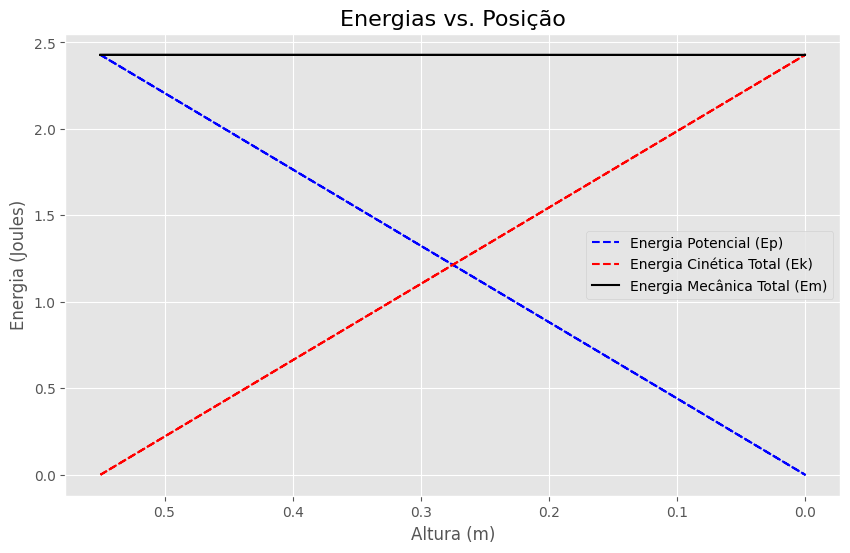

In [8]:
# Configura a figura
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')

# Plotar Energia Potencial (Ep)
plt.plot(h_oscilacao_numerico, Ep_numerico, color='blue', linestyle='--', label='Energia Potencial (Ep)')

# Plotar Energia Cinética Total (Ek)
plt.plot(h_oscilacao_numerico, Ek_total_numerico, color='red', linestyle='--', label='Energia Cinética Total (Ek)')

# Plotar Energia Mecânica Total (Em)
plt.plot(h_oscilacao_numerico, Em_total_numerico, color='black', linestyle='-', label='Energia Mecânica Total (Em)')

# Configurações do gráfico
plt.title('Energias vs. Posição', fontsize=16)
plt.xlabel('Altura (m)', fontsize=12)
plt.ylabel('Energia (Joules)', fontsize=12)
plt.legend()
plt.grid(True)

# Inverte o eixo X (altura) para ler da "partida" (H0) até a "chegada" (0)
plt.gca().invert_xaxis() # gca() = "Get Current Axis"

# Mostra o gráfico
plt.show()